In [1]:
import math
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bus_df = pd.read_csv("./bus_train.csv", index_col = 0, parse_dates=[0])
print(bus_df)

In [3]:
# pfr_station_seq 站序号
# pfr_get_on_number 上车人数
# pfr_get_off_number 下车人数
# prf_get_person_count 车内人数
# pfr_upload_time 采集时间

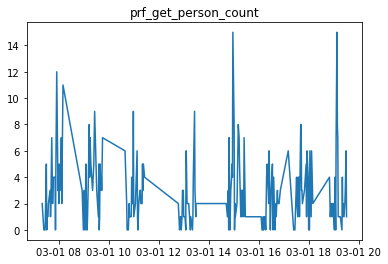

In [4]:
plt.plot(bus_df['pfr_get_off_number'])
plt.title('prf_get_person_count')
plt.show()

In [36]:
print(bus_df.prf_get_person_count['2021/3/1 7:20:28': '2021/3/1 7:25:52'])

pfr_upload_time
2021-03-01 07:24:00     8
2021-03-01 07:25:00    15
Name: prf_get_person_count, dtype: int64


In [35]:
# 平稳性检验
diff=0
adf=ADF(bus_df['prf_get_person_count'])
# print(adf)
if adf[1]>0.05:
    print(u'原始序列经检验不平稳,p值为:%s' %(adf[1]))
else:
    print(u'原始序列经检验平稳,p值为:%s' %(adf[1]))

原始序列经检验平稳,p值为:4.041451054582282e-06


In [24]:
# P值大于0.05 原始数据序列不平稳，需要采用差分法消除非平稳趋势

In [25]:
# 纯随机性检验
from statsmodels.stats.diagnostic import acorr_ljungbox
[[lb],[p]]=acorr_ljungbox(bus_df['prf_get_person_count'], lags=1,return_df=False)
if p<0.05:
    print(u'原始序列为非白噪声序列,p值为:%s'%p)
else:
    print(u'原始序列为白噪声序列,p值为:%s' %p)

原始序列为非白噪声序列,p值为:1.7394410386179063e-42


In [26]:
# ARIMA模型建立
# 导入warnings，忽略warnings
import warnings
warnings.filterwarnings('ignore')
model = ARIMA(bus_df['prf_get_person_count'], order = (2,,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                               ARIMA Model Results                                
Dep. Variable:     D.prf_get_person_count   No. Observations:                  219
Model:                     ARIMA(2, 1, 2)   Log Likelihood                -613.916
Method:                           css-mle   S.D. of innovations              3.990
Date:                    Sat, 15 May 2021   AIC                           1239.833
Time:                            21:49:29   BIC                           1260.167
Sample:                                 1   HQIC                          1248.045
                                                                                  
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.0131      0.455     -0.029      0.977      -0.906       0.879
ar.L1.D.prf_get_person_count    -0.0921      

KeyError: 'ARIMA'

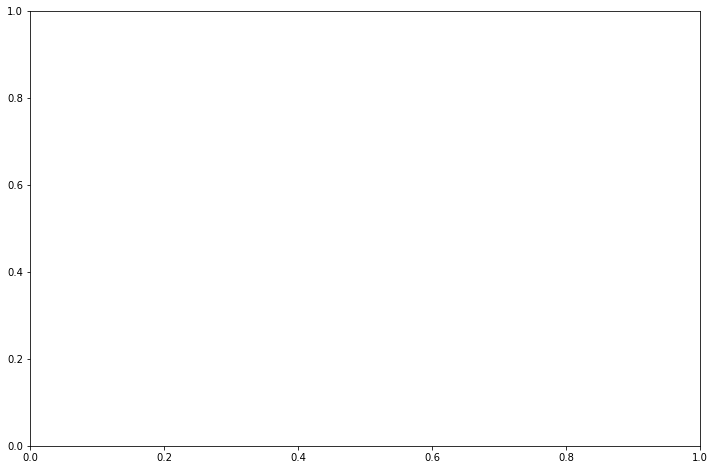

In [33]:
# 模型拟合
# bus_df['ARIMA'] = model_fit.predict(typ='levels')
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(12, 8)
# bus_df['prf_get_person_count'].plot(color = 'b', linestyle = '-', ax=axarr)
bus_df['ARIMA'].plot(color = 'r', linestyle = '--', ax=axarr)
axarr.set_title('ARIMA(2,1,2)')
# plt.xlabel('Index')
# plt.ylabel('prf_get_person_count')
# plt.show()